In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# input x is some random numbers between 0 and 1
batch_size = 1000
x_0 = np.zeros((batch_size,2)) + np.random.randn(batch_size,2)/5
y_0 = np.zeros(batch_size)
x_1 = (np.random.rand(batch_size,2)-0.5)*2
x_1[:,1] = np.sqrt(1*1 - x_1[:,0]*x_1[:,0])
x_1[:,1] *= np.random.choice([-1,1], batch_size, replace=True)
x_1 = x_1 + np.random.randn(batch_size,2)/10
y_1 = np.ones(batch_size)

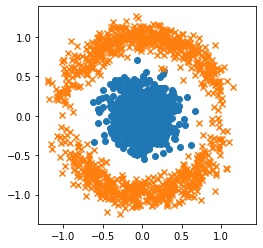

In [ ]:
plt.scatter(x_0[:,0], x_0[:,1], marker='o')
plt.scatter(x_1[:,0], x_1[:,1], marker='x')
plt.axis('square')
plt.savefig('Circle.png')

In [ ]:
X = np.vstack([x_0,x_1])
X.shape

(2000, 2)

In [ ]:
x_0

array([[ 0.26107177,  0.09659472],
       [ 0.23518965, -0.17431125],
       [ 0.05647054,  0.30688747],
       ...,
       [-0.06457913, -0.06326338],
       [ 0.11972339,  0.01504257],
       [-0.31366926, -0.168982  ]])

In [ ]:
x_1

array([[-0.31182112, -0.79819552],
       [ 0.69037024, -0.64398191],
       [-0.34574373,  0.97062414],
       ...,
       [ 0.64293792,  0.88544189],
       [-0.53140901,  0.51661431],
       [ 0.9651257 , -0.03209088]])

(-1.3118867835122665,
 1.4416377597836019,
 -1.3693276580103222,
 1.3841968852855462)

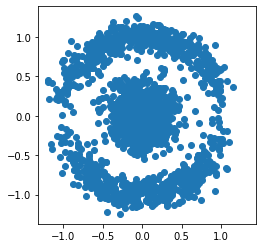

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.axis('square')

In [ ]:
from sklearn.decomposition import PCA

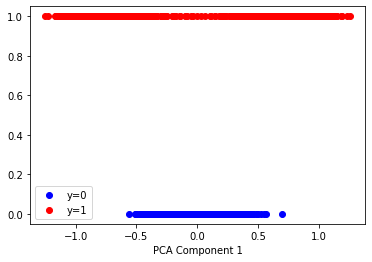

In [ ]:
# concatenate the two sets of input data
X = np.concatenate((x_0, x_1), axis=0)

# perform PCA to reduce the dimensionality to 1
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# plot the results
plt.scatter(X_pca[:batch_size], np.zeros(batch_size), c='b', label='y=0')
plt.scatter(X_pca[batch_size:], np.ones(batch_size), c='r', label='y=1')
plt.xlabel('PCA Component 1')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

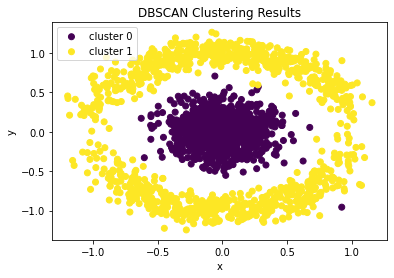

In [ ]:
# Combine the two sets of data into one array
x = np.concatenate((x_0, x_1), axis=0)

# Apply DBSCAN with epsilon=0.2 and min_samples=5
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(x)

# Separate the labels for the two sets of data
labels_0 = labels[:batch_size]
labels_1 = labels[batch_size:]

# Plot the two sets of data
plt.scatter(x_0[:,0], x_0[:,1], c=labels_0)
plt.scatter(x_1[:,0], x_1[:,1], c=labels_1)

# Add plot labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.title("DBSCAN Clustering Results")
plt.legend(["cluster 0", "cluster 1"])

# Show the plot
plt.show()